## Shannon Entropy

Shannon Entropy is used to quantify the uncertainty in a probability distribution.

It is denoted by $H(x)$ or $H(P)$, where $x$ is a random variable and $P$ is the probability distribution of $x$.

$$H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)]$$

### Low Entropy
The distribution is *deterministic* and the outcomes are *certain*.
E.g., a weighted coin that always lands heads up ($P(1)=1$

### High Entropy
The outcomes are *uncertain*.
The uniform distribution can be of highest entropy.
E.g., a fair coin ($P(0)=P(1)=0.5$)

Shannon entropy for a binary random variable: $(p-1)log(1-p) - plog(p)$

When working with continuous variables, Shannon entropy is called **differential entropy**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

This function will throw RuntimeWarning when the probability is 0 or 1.
- divide by zero error
- invalid value error

`np.float64(nan)`

In [3]:
binary_entropy(0.00001)

np.float64(0.00012512920464949012)

In [4]:
binary_entropy(0.99999)

np.float64(0.00012512920464901166)

In [5]:
binary_entropy(0.9)

np.float64(0.3250829733914482)

In [6]:
binary_entropy(0.5)

np.float64(0.6931471805599453)

In [7]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points

In [8]:
H = binary_entropy(p)

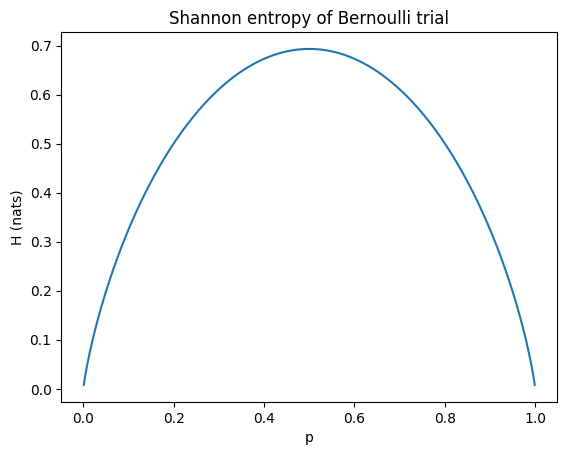

In [9]:
fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)

### Kullback-Leibler Divergence

KL divergence enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted
$D_{KL}$) is

$$D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)]$$


## Cross-Entropy

KL divergence provides us with the **cross-entropy cost** function.

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is:

$$C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y}))$$

In machine learning, loss functions help models determine how wrong it is and improve itself based on that wrongness. They are mathematical functions that quantify the difference between predicted and actual values in a machine learning model, but this isn’t all they do.

The measure of error from a loss function also serves as a guide during the optimization process by providing feedback to the model on how well it fits the data. Hence, most machine learning models implement a loss function during the optimization phase, where the model parameters are chosen to help the model minimize the error and arrive at an optimal solution – the smaller the error, the better the model.

In [23]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [24]:
cross_entropy(1, 0.9997)

np.float64(0.00030004500900199243)

In [25]:
cross_entropy(1, 0.9)

np.float64(0.10536051565782628)

In [26]:
cross_entropy(1, 0.6)

np.float64(0.5108256237659907)

In [27]:
cross_entropy(1, 0.3)

np.float64(1.2039728043259361)